In [3]:
import os      #importing the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn import metrics
import seaborn as seabornInstance 
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import linear_model

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
os.chdir('U:\ProjectDataset')        #setting the directory

In [3]:
dt=pd.read_excel('LUADZscores.xlsx')    #importing the data set

In [5]:
dt=dt.set_index(dt.columns[0])          #setting the first column as index

In [9]:
tar=pd.read_excel('survival_LUAD.xlsx')  #importing the target variable

In [13]:
import numpy as np
y=np.array(tar)
y=y.flatten()

In [8]:
df=dt

In [15]:
#appying the random forest regressor for feature selection

from sklearn.ensemble import RandomForestRegressor    
model=RandomForestRegressor(random_state=1,max_depth=10)
df=pd.get_dummies(df)
model.fit(df,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

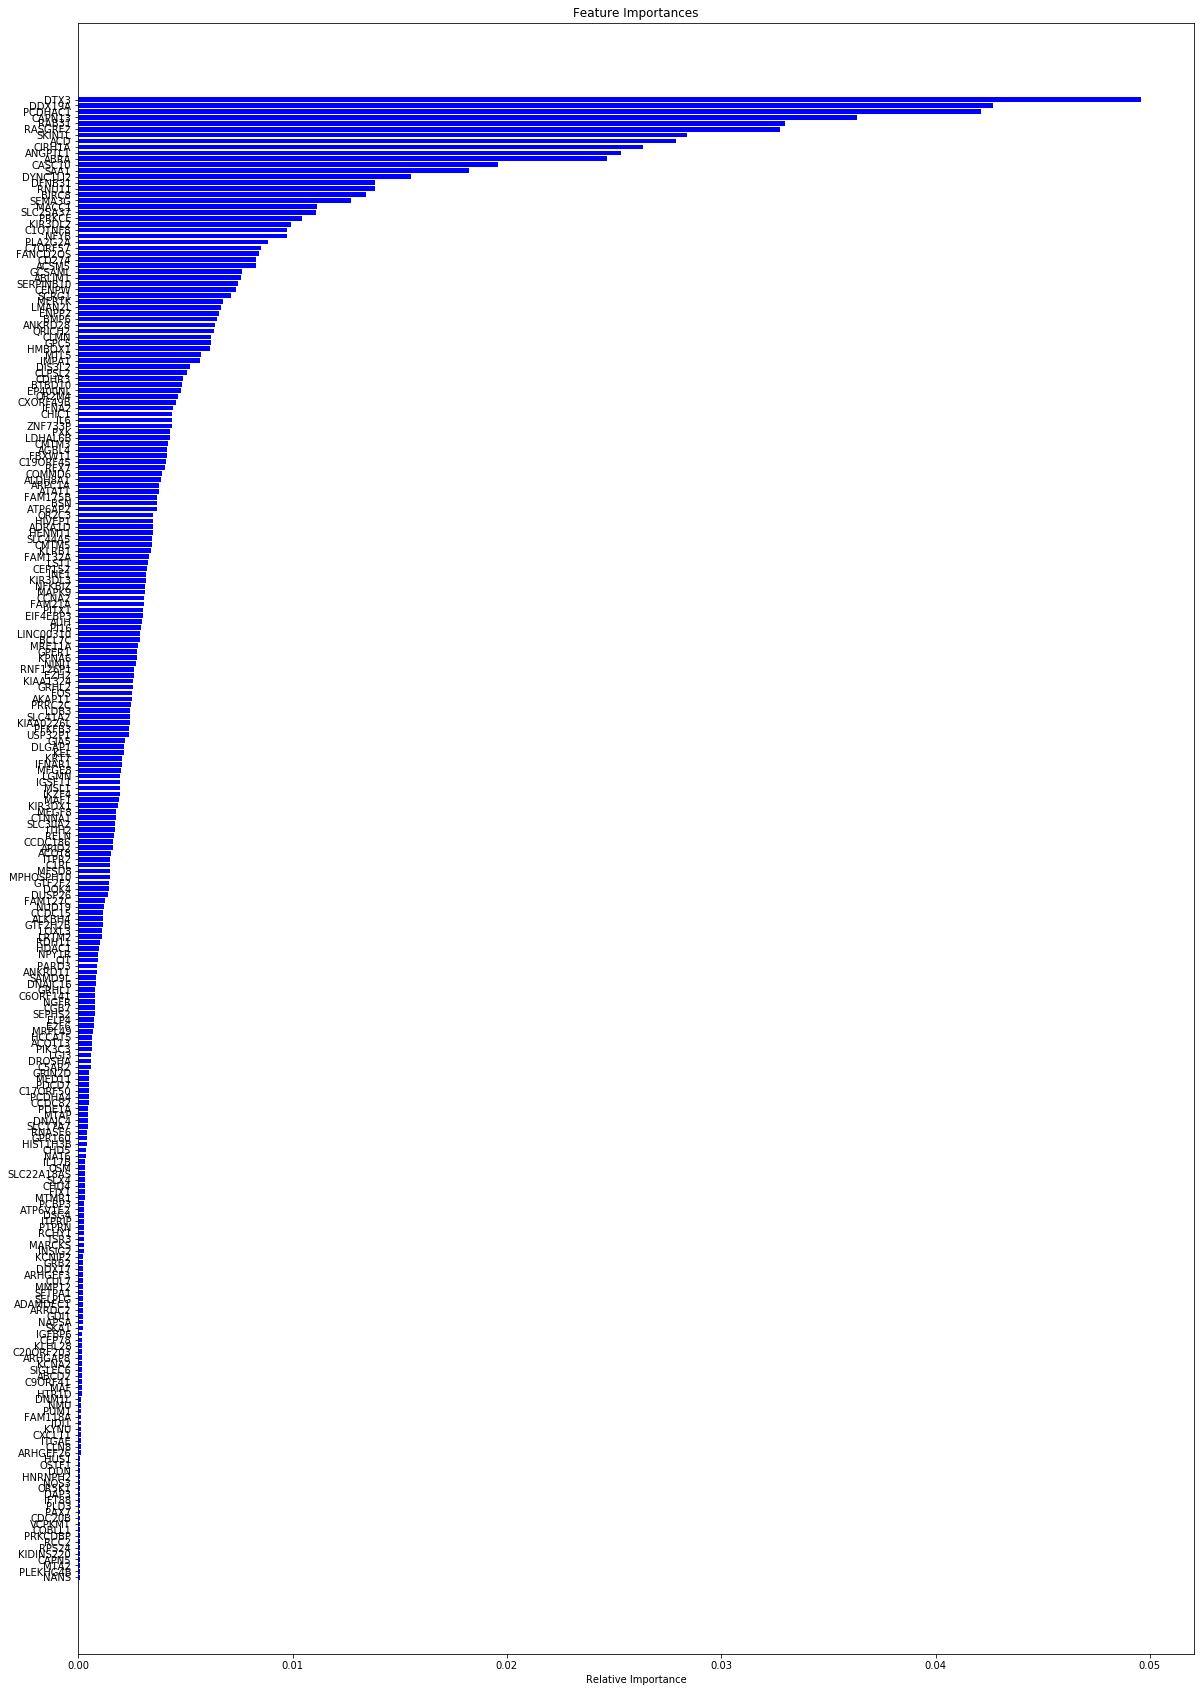

<Figure size 432x288 with 0 Axes>

In [48]:
 #plotting the importances

features = df.columns                         
importances = model.feature_importances_
plt.figure(figsize=(20,30))
indices = np.argsort(importances)[-250:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
plt.savefig('LUAD.png')

In [ ]:
#deleting the unimportant features from the data set

features=[features[i] for i in indices]   
column=df.columns
for i in column:
    if(i in features):
        print('yes')
    else:
        del dt[i]

In [4]:
os.chdir('U:\\More Data')              #setting path to the directory

In [5]:
#importing the selected features

dt=pd.read_excel('LUAD_250_NoDepth.xlsx',index_col=0)  #features
Y=pd.read_excel('survival_LUAD.xlsx')                  #target variable

In [6]:
#splitting data into 80/20 train and test set and then 80/20 train and validation set

X_train,X_test,y_train,y_test=train_test_split(dt,Y,test_size=0.2,random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [7]:
#Applying Linear Regression

lm=linear_model.LinearRegression()
model=lm.fit(X_train,y_train)
y_predval=lm.predict(X_val)

In [8]:
# Print result of MAE

from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))
print('Variance score: %.2f' % model.score(X_val, y_val))

45.36960352709391
3608.2706864577226
60.06888284675954
Variance score: -5.60


In [9]:
# KFOlD

estimator = model
kfold = KFold(n_splits=10, random_state=0)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print(results)
print(results.mean(), results.std())

[ -8.79025832  -9.37860589 -32.79955852  -3.49615709  -2.04616029
 -35.72480843  -3.21139465 -69.59007746  -7.07763486 -30.80898758]
-20.29236430761286 20.659835013204233


In [12]:
# Hyper parameter optimization

tuned_parameters = {'fit_intercept':[True,False],
                     'n_jobs':[-1,1]}
lm=linear_model.LinearRegression()
grid=GridSearchCV(model,tuned_parameters,scoring='r2',verbose=1)    
grid.fit(X_train,y_train)
print(grid.best_estimator_)




Fitting 3 folds for each of 4 candidates, totalling 12 fits
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished


In [19]:
#Appying model again on best parameters

lm=linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)
model=lm.fit(X_train,y_train)
y_predval=lm.predict(X_val)

In [20]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))
print('Variance score: %.2f' % model.score(X_val, y_val))

45.36960352709391
3608.2706864577226
60.06888284675954
Variance score: -5.60


In [21]:
estimator = model
kfold = KFold(n_splits=10, random_state=0)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print(results)
print(results.mean(), results.std())

[ -8.79025832  -9.37860589 -32.79955852  -3.49615709  -2.04616029
 -35.72480843  -3.21139465 -69.59007746  -7.07763486 -30.80898758]
-20.29236430761286 20.659835013204233


In [ ]:
                         ''''APPLYING MODEL ON TESTING DATA'''

In [16]:
lm.fit(X_train, y_train)

# Predicting the Test set results
y_pred = lm.predict(X_test)

# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))

# Print result of MSE
print(metrics.mean_squared_error(y_test, y_pred))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Explained variance score: 1 is perfect prediction (Accuracy Score)
print('Variance score: %.2f' % lm.score(X_test, y_test))

62.8764831085813
11910.175262775838
109.13374942141334
Variance score: -7.72


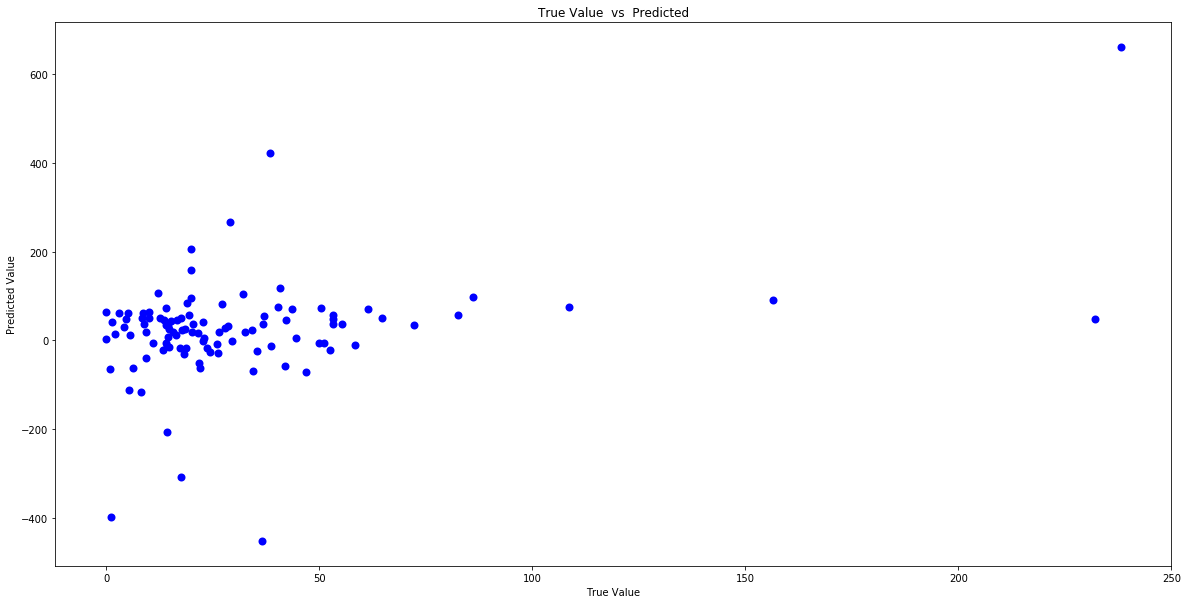

In [18]:
#Ploting the True value vs predicted value

plt.figure(figsize=(20,10))
plt.scatter(y_test, y_pred, color='blue', linewidth=2)
plt.title('True Value  vs  Predicted')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()